In [10]:
import pandas as pd
import glob
import os
import numpy as np
import unidecode
import plotly.express as px
print ("♂♀")


♂♀


# Collect data

## df_ip

In [11]:
# https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#consulter
path_insee = './insee.fr/dpt_2000_2021_csv/'
all_files = glob.glob(os.path.join(path_insee, "*.csv"))
df_ip = pd.concat((pd.read_csv(f, sep=';') for f in all_files), ignore_index=True)

In [12]:
df_ip.columns=['sexe', 'prenom', 'annee', 'dpt', 'nombre']
df_ip['prenom'] = df_ip['prenom'].apply(lambda name: unidecode.unidecode(str(name)).upper())

df_ip = df_ip.query("dpt != 'XX' & prenom != '_PRENOMS_RARES' & annee != 'XXXX'").dropna().sort_values(by=['sexe', 'prenom']).reset_index(drop=True)
df_ip['annee'] = df_ip['annee'].astype(int)
df_ip['nombre'] = df_ip['nombre'].astype(int)

df_ip

,sexe,prenom,annee,dpt,nombre
0,1,AAHIL,2016,95,3
1,1,AARON,2004,54,3
2,1,AARON,2006,54,7
3,1,AARON,2007,54,10
4,1,AARON,2008,54,21
...,...,...,...,...,...
1124118,2,ZYA,2018,59,3
1124119,2,ZYA,2011,85,4
1124120,2,ZYA,2011,91,3
1124121,2,ZYA,2021,35,5


## df_ipbig

In [13]:
# https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#consulter

path_insee = './insee.fr/'
df_ipbig = pd.read_csv(os.path.join(path_insee, "dpt2021.csv"), sep=';')

In [14]:
df_ipbig.columns=['sexe', 'prenom', 'annee', 'dpt', 'nombre']
df_ipbig = df_ipbig.query("dpt != 'XX' & prenom != '_PRENOMS_RARES' & annee != 'XXXX'").dropna().reset_index(drop=True)
df_ipbig['prenom'] = df_ipbig['prenom'].apply(lambda name: unidecode.unidecode(str(name)).upper())
df_ipbig['annee'] = df_ipbig['annee'].astype(int)
df_ipbig['nombre'] = df_ipbig['nombre'].astype(int)
#df_ipbig['perc_dpt'] = df_ipbig.nombre
df_ipbig = df_ipbig.sort_values(by=['sexe', 'prenom', 'annee'])
df_ipbig

,sexe,prenom,annee,dpt,nombre
0,1,AADIL,1983,84,3
1,1,AADIL,1992,92,3
2,1,AAHIL,2016,95,3
3,1,AARON,1962,75,3
4,1,AARON,1976,75,3
...,...,...,...,...,...
3723937,2,ZYA,2013,59,3
3723938,2,ZYA,2017,974,3
3723939,2,ZYA,2018,59,3
3723940,2,ZYA,2021,35,5


## df_he

In [15]:
# https://www.ine.es/tnombres/formGeneralresult.do

path_ine = './ine.es/'

dpt_list = [('araba', 'ARA'), ('bizkaia', 'BIZ'), ('gipuzkoa','GIP'), ('nafarroa','NAF')]
annee_list = [2000, 2010, 2020]
sexe_list = [('mutiko', 1), ('neska', 2)]

df_he = pd.DataFrame(columns=['sexe', 'prenom', 'annee', 'dpt', 'nombre'])
for (dpt, dpt_code) in dpt_list:
    for annee in annee_list:
        for (sexe, sexe_code) in sexe_list:
            file = path_ine + dpt + '_' + str(annee) + '_' + sexe + '.csv'
            dfile = pd.read_csv(file, sep=';')
            dfile_new = pd.DataFrame(columns=['sexe', 'prenom', 'annee', 'dpt', 'nombre'])
            dfile_new.prenom = dfile.Nombre
            dfile_new.nombre = dfile.Total
            dfile_new.sexe = sexe_code
            dfile_new.annee = annee
            dfile_new.dpt = dpt_code
            df_he = df_he.append(dfile_new, ignore_index=True)

/var/folders/kf/szvc11gs0lq16c0xs5j4vlk00000gp/T/ipykernel_65582/2239742602.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_he = df_he.append(dfile_new, ignore_index=True)
/var/folders/kf/szvc11gs0lq16c0xs5j4vlk00000gp/T/ipykernel_65582/2239742602.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_he = df_he.append(dfile_new, ignore_index=True)
/var/folders/kf/szvc11gs0lq16c0xs5j4vlk00000gp/T/ipykernel_65582/2239742602.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_he = df_he.append(dfile_new, ignore_index=True)
/var/folders/kf/szvc11gs0lq16c0xs5j4vlk00000gp/T/ipykernel_65582/2239742602.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [16]:
df_he.nombre = df_he.nombre.str.replace('\xa0', '')
df_he.nombre = df_he.nombre.str.replace('.', '')
df_he = df_he.dropna()
df_he['nombre'] = df_he['nombre'].astype(int)
df_he = df_he.reset_index(drop=True)
df_he['prenom'] = df_he['prenom'].apply(lambda name: unidecode.unidecode(str(name)).upper())
df_he

/var/folders/kf/szvc11gs0lq16c0xs5j4vlk00000gp/T/ipykernel_65582/354484102.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_he.nombre = df_he.nombre.str.replace('.', '')


,sexe,prenom,annee,dpt,nombre
0,1,IKER,2000,ARA,512
1,1,UNAI,2000,ARA,442
2,1,MIKEL,2000,ARA,441
3,1,JON,2000,ARA,380
4,1,ANDER,2000,ARA,379
...,...,...,...,...,...
7879,2,NATALIA,2020,NAF,5
7880,2,OIHANE,2020,NAF,5
7881,2,RIM,2020,NAF,5
7882,2,SALMA,2020,NAF,5


## df_all

In [17]:
df_all = pd.concat([df_ipbig, df_he], ignore_index=True)
df_all

,sexe,prenom,annee,dpt,nombre
0,1,AADIL,1983,84,3
1,1,AADIL,1992,92,3
2,1,AAHIL,2016,95,3
3,1,AARON,1962,75,3
4,1,AARON,1976,75,3
...,...,...,...,...,...
3731821,2,NATALIA,2020,NAF,5
3731822,2,OIHANE,2020,NAF,5
3731823,2,RIM,2020,NAF,5
3731824,2,SALMA,2020,NAF,5


# Charts

In [18]:
names = ['ODEI', 'HODEI']
names = ['THOMAS']

def addZeros(df):
    annee_min = df.annee.min()
    annee_max = df.annee.max()
    
    prenom_done = []
    for prenom in df.prenom:
        if prenom not in prenom_done:
            for an in range(annee_min, annee_max+1):
                df = df.append({'prenom': prenom, 'annee': an, 'nombre': 0}, ignore_index=True)
            prenom_done.append(prenom)
    return df

#df = df_ip.copy()
df = df_ipbig.copy()
#df = df_he.copy()
#df = df_all.copy()


#df = df.query("prenom in @names and sexe == 2").groupby(by=['sexe', 'prenom', 'annee']).agg(nombre = ("nombre", sum)).reset_index()
#df = df.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee', 'dpt']).agg(nombre = ("nombre", sum)).reset_index()
df = df.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee']).agg(nombre = ("nombre", sum)).reset_index()

#print(df.query("annee == 2013"))
#df = addZeros(df)
print(df)

#fig=px.histogram(df, x="annee", y="nombre", title=f'Naissances {names} en France', height=600)#, color='dpt')

#df2=df.drop(columns='sexe')
#fig=px.line(df2, x="annee", y="nombre", title=f'Naissances {names}', color='prenom', markers=True, height=600)
fig=px.line(df2, x="annee", y="nombre", title=f'Naissances {names}', color='prenom', markers=True, height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()


#fig=px.bar(df, x="annee", y="nombre", title=f'Naissances {names} en France', color='prenom', barmode="group", height=600)
#fig.update_yaxes(rangemode="tozero")
#fig.show()


     sexe  prenom  annee  nombre
0       1  THOMAS   1900      67
1       1  THOMAS   1901      35
2       1  THOMAS   1902      64
3       1  THOMAS   1903      56
4       1  THOMAS   1904      70
..    ...     ...    ...     ...
150     2  THOMAS   1954       5
151     2  THOMAS   1955       5
152     2  THOMAS   1961       6
153     2  THOMAS   1964       3
154     2  THOMAS   1966       3

[155 rows x 4 columns]


NameError: name 'df2' is not defined

## Some plots

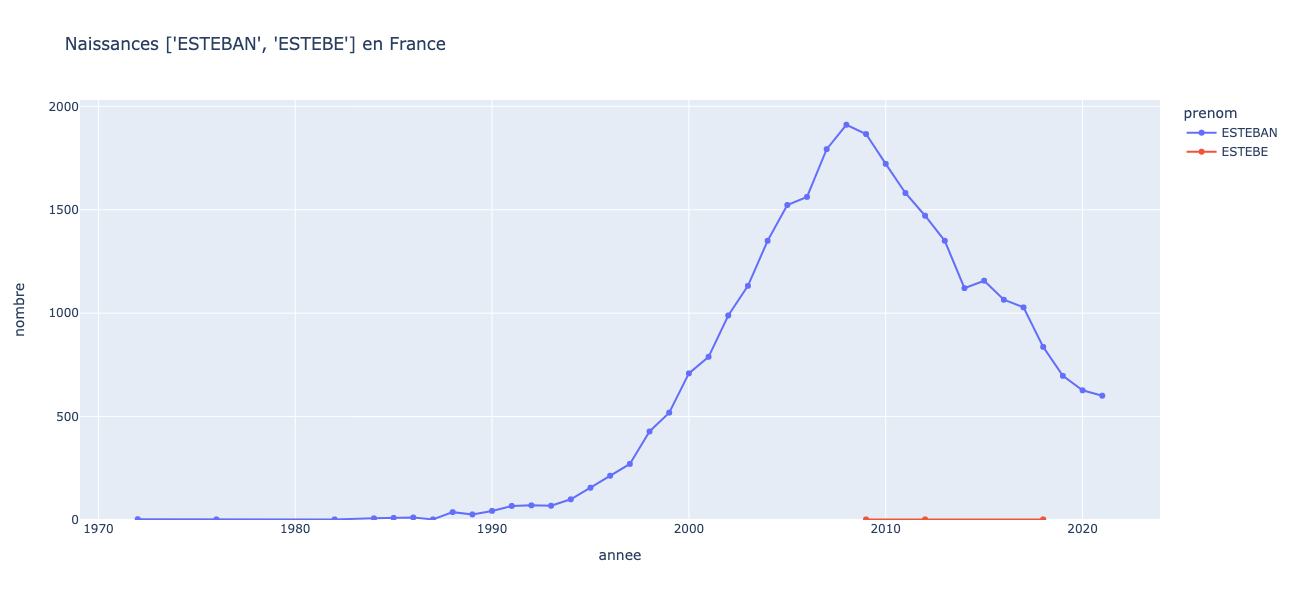

UndefinedVariableError: name 'dpt' is not defined

In [20]:
names = ['ESTEBAN', 'ESTEBE']

#df = df_ip
df = df_ipbig

df = df.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.line(df, x="annee", y="nombre", title=f'Naissances {names} en France', color='prenom', markers=True, height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()

df = df.query("prenom in @names & dpt == 64").groupby(by=['sexe', 'prenom', 'annee']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.line(df, x="annee", y="nombre", title=f'Naissances {names} au 64', color='prenom', markers=True, height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()

df = df.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee', 'dpt']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.histogram(df, x="annee", y="nombre", title=f'Naissances {names} en France', nbins=22, color='dpt', height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()
#fig.update_yaxes(rangemode="tozero")


In [ ]:
# df = df.groupby(['sexe', 'prenom', 'annee', 'dpt']).agg(nombre = ("nombre", sum)).reset_index().sort_values('prenom')
df_ip3 = df_ip2.groupby(['sexe', 'prenom', 'dpt']).agg(nombre = ("nombre", sum)).reset_index()

In [ ]:
df_ip4 = df_ip3.query("dpt==64 & sexe==1").sort_values('nombre', ascending=False, ignore_index=True)
#df_ip4.to_csv(path_insee+'../../Naissance_Boy_64_2000-2021.csv', sep=';')
df_ip4

In [ ]:
df_ip5=df_ip3.query("dpt==64 & sexe==2").sort_values('nombre', ascending=False, ignore_index=True)
#df_ip5.to_csv(path_insee+'../../Naissance_Girl_64_2000-2021.csv', sep=';')
df_ip5

In [ ]:
df_he3 = df_he2.groupby(by=['sexe', 'prenom']).sum().reset_index()
df_he3

In [ ]:
df_he4 = df_he3.query("sexe==1").sort_values('nombre', ascending=False, ignore_index=True)
df_he4

In [ ]:
#df_he4.to_csv(path_ine+'../Naissance_Boy_Hegoalde_2000-2021.csv', sep=';')

In [ ]:
df_he5 = df_he3.query("sexe==2").sort_values('nombre', ascending=False, ignore_index=True)
df_he5

In [ ]:
#df_heg5.to_csv(path_ine+'../Naissance_Girl_Hegoalde_2000-2021.csv', sep=';')

In [ ]:
names = ['UNAI', 'ESTEBAN', 'EKAIN', 'ANAE', 'LUNA', 'KATERINA', 'LAIDA']

df_heselect2 = df_he2.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.line(df_heselect2, x="annee", y="nombre", title=f'Naissances {names} en Hegoalde', color='prenom', markers=True, height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()

df_heselect1 = df_he2.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee','dpt']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.histogram(df_heselect1, x="annee", y="nombre", title=f'Naissances {names} en Hegoalde', nbins=3, color='dpt', height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()
#fig.update_yaxes(rangemode="tozero")


In [ ]:
df_ip6 = df_ip2.query("dpt==64").groupby(['sexe', 'prenom', 'dpt']).agg(nombre = ("nombre", sum)).reset_index()
df_he6 = df_he2.groupby(['sexe', 'prenom','dpt']).agg(nombre = ("nombre", sum)).reset_index()
df_loc = df_ip6
df_loc = df_loc.append(df_he6, ignore_index=True)
df_loc.sort_values('nombre', ascending=False, ignore_index=True)

In [ ]:
names = ['EKAIN','UNAI']
names = ['UNAI', 'ESTEBAN', 'EKAIN', 'ANAE', 'LUNA', 'KATERINA', 'LAIDA']

#px.pie(df_loc.query('prenom in @names'), values='nombre', names='dpt')
px.bar(df_all.query('prenom in @names'), x='prenom', y='nombre', color='dpt')

In [ ]:
#df_all[df_all.prenom.str.contains("ODEI")].groupby(by=['sexe', 'prenom']).agg(nombre = ('nombre', sum)).sort_values('prenom').reset_index()
df_all[df_all.prenom.str.contains("ADOL")].groupby(by=['sexe', 'prenom', 'dpt', 'annee']).agg(nombre = ('nombre', sum)).sort_values('dpt').reset_index()

In [ ]:
path_vote = './Vote/'

VoteDict = {
    'Boy64AP'  : pd.read_csv(path_vote + 'Naissance_Boy_64_2000-2021_AP.csv', sep=';', index_col=0),
    'Girl64AP' : pd.read_csv(path_vote + 'Naissance_Girl_64_2000-2021_AP.csv', sep=';', index_col=0),
    'BoyHeAP'  : pd.read_csv(path_vote + 'Naissance_Boy_Hegoalde_2000-2021_AP.csv', sep=';', index_col=0),
    'GirlHeAP' : pd.read_csv(path_vote + 'Naissance_Girl_Hegoalde_2000-2021_AP.csv', sep=';', index_col=0),
    'Boy64XL'  : pd.read_csv(path_vote + 'Naissance_Boy_64_2000-2021_XL.csv', sep=';', index_col=0),
    'Girl64XL' : pd.read_csv(path_vote + 'Naissance_Girl_64_2000-2021_XL.csv', sep=';', index_col=0),
    'BoyHeXL'  : pd.read_csv(path_vote + 'Naissance_Boy_Hegoalde_2000-2021_XL.csv', sep=';', index_col=0),
    'GirlHeXL' : pd.read_csv(path_vote + 'Naissance_Girl_Hegoalde_2000-2021_XL.csv', sep=';', index_col=0)
}

for k, df in VoteDict.items():
    df.vote = df.vote.fillna(0).astype(int)
    if 'XL' in k:
        df['voter'] = 'XL'
    else:
        df['voter'] = 'AP'
    if 'He' in k:
        df['dpt'] = 'HE'

#VoteDict['Boy64AP']

#for k, df in VoteDict.items():
    #print (k)
    #print (df.query("vote>0"))
    #print (df.query("vote>0").shape)

In [ ]:
df_vote = pd.concat(VoteDict, ignore_index=True).drop(columns='nombre')
df_vote = df_vote.query("vote !=0")
df_vote = df_vote.pivot(index=['sexe', 'prenom', 'dpt'], columns='voter', values='vote').fillna(0).astype(int).reset_index()
df_vote.sort_values(inplace=True, by=['sexe', 'prenom', 'dpt'])
df_vote.columns.name = ''
#df_vote.to_csv(path_vote+'resultats_vote.csv', sep=';')
df_vote = df_vote.groupby(['sexe', 'prenom']).agg(
    AP = ("AP", max),
    XL = ("XL", max)
).reset_index()


#def_select = df_vote.query("AP>0 & XL>0").reset_index(drop=True)
#def_select = df_vote.query("AP>0 | XL>0").reset_index(drop=True)
def_select = df_vote.query("(AP>0 & XL==0) | (XL>0 & AP==0)").sort_values(by=['XL', 'sexe', 'prenom', 'dpt']).reset_index(drop=True)




print (def_select.prenom.unique().shape)
print (def_select.to_string())